In [1]:
import pickle 
import numpy as np
from sklearn.metrics import f1_score, confusion_matrix
import matplotlib.pyplot as plt

file_name = "save_predictions.pkl"

with open(file_name, "rb") as fp:
        predictions, targets = pickle.load(fp)
        
print(predictions)
print(targets)

[4.52449749e-04 1.70413265e-03 6.12327858e-05 ... 1.01844635e-04
 2.93681398e-03 5.67867840e-03]
[0. 0. 0. ... 0. 0. 0.]


In [2]:
thresh_list = []
f1_list = []
max_f1 = -1
max_thresh_f1 = -1
percent_list = []
max_percent = -1
max_thresh_percent = -1
for j in np.arange(0.0, 1.0, 0.01):
    print(j)
    bool_predictions = [int(i >= j) for i in predictions]
    f1 = f1_score(targets, bool_predictions)
    f1_list.append(f1)
    thresh_list.append(j)
    
    if max_f1 <= f1:
        max_f1 = f1
        max_thresh_f1 = j
        
    
    
    tn, fp, fn, tp = confusion_matrix(targets, bool_predictions).ravel()
    percent = (tp / (tp + fp))
    percent_list.append(percent)
    
    if max_percent <= percent:
        max_percent = percent
        max_thresh_percent = j


0.0
0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.19
0.2
0.21
0.22
0.23
0.24
0.25
0.26
0.27
0.28
0.29
0.3
0.31
0.32
0.33
0.34
0.35000000000000003
0.36
0.37
0.38
0.39
0.4
0.41000000000000003
0.42
0.43
0.44
0.45
0.46
0.47000000000000003
0.48
0.49
0.5
0.51
0.52
0.53
0.54
0.55
0.56
0.5700000000000001
0.58
0.59
0.6
0.61
0.62
0.63
0.64
0.65
0.66
0.67
0.68
0.6900000000000001
0.7000000000000001
0.71
0.72
0.73
0.74
0.75
0.76
0.77
0.78
0.79
0.8
0.81
0.8200000000000001
0.8300000000000001
0.84
0.85
0.86
0.87
0.88
0.89
0.9
0.91
0.92
0.93
0.9400000000000001
0.9500000000000001
0.96
0.97
0.98
0.99


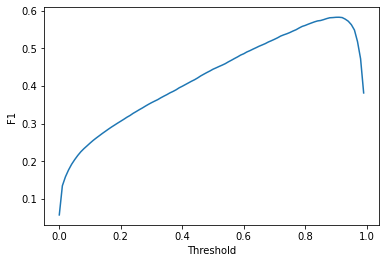

In [3]:
plt.plot(thresh_list, f1_list)
plt.xlabel('Threshold')
plt.ylabel('F1')
plt.show()

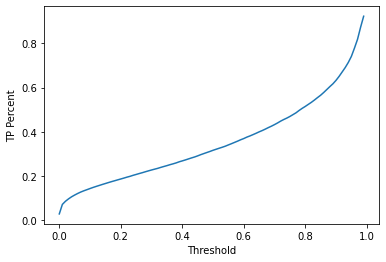

In [4]:
plt.plot(thresh_list, percent_list)
plt.xlabel('Threshold')
plt.ylabel('TP Percent')
plt.show()

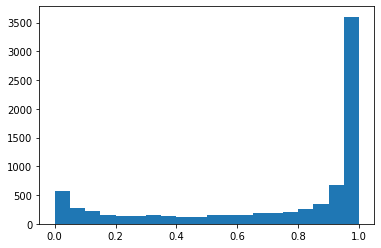

In [5]:
true_pred_targ = []
for i in range(len(predictions)):
    if targets[i] == 1.0:
        true_pred_targ.append(predictions[i])
        
plt.hist(true_pred_targ, bins = 20)
plt.show()

In [6]:
print("Best f1 achieved: " + str(max_f1) + " - at threshold: " + str(max_thresh_f1))
print("Best percent achieved: " + str(max_percent) + " - at threshold: " + str(max_thresh_percent))

Best f1 achieved: 0.5829621380846326 - at threshold: 0.91
Best percent achieved: 0.9221846302561624 - at threshold: 0.99


In [7]:
def sort_key(order):
    return order[0]

pairs_sort = []
for i in range(len(predictions)):
    pairs_sort.append([predictions[i], targets[i]])
    
    
print("TOP 100: [predicted, target]")

pairs_sort.sort(key=sort_key, reverse=True)

for i in pairs_sort[:100]:
    print(i)

TOP 100: [predicted, target]
[0.9999976, 1.0]
[0.9999974, 1.0]
[0.99999726, 1.0]
[0.9999968, 1.0]
[0.99999666, 1.0]
[0.99999607, 1.0]
[0.99999595, 1.0]
[0.9999951, 1.0]
[0.9999949, 1.0]
[0.9999944, 1.0]
[0.99999404, 1.0]
[0.9999939, 1.0]
[0.99999344, 1.0]
[0.9999931, 1.0]
[0.99999285, 1.0]
[0.99999285, 1.0]
[0.9999926, 1.0]
[0.999992, 1.0]
[0.999992, 1.0]
[0.9999919, 1.0]
[0.9999918, 1.0]
[0.99999166, 1.0]
[0.99999034, 1.0]
[0.9999902, 1.0]
[0.99998987, 1.0]
[0.9999896, 1.0]
[0.9999895, 1.0]
[0.9999893, 1.0]
[0.9999888, 1.0]
[0.9999881, 1.0]
[0.9999877, 1.0]
[0.9999877, 1.0]
[0.9999876, 1.0]
[0.9999876, 1.0]
[0.99998736, 1.0]
[0.9999869, 1.0]
[0.99998677, 1.0]
[0.9999863, 1.0]
[0.9999863, 1.0]
[0.9999858, 1.0]
[0.9999858, 1.0]
[0.99998546, 1.0]
[0.9999852, 1.0]
[0.999985, 1.0]
[0.9999845, 1.0]
[0.9999844, 1.0]
[0.999984, 1.0]
[0.9999838, 1.0]
[0.99998343, 1.0]
[0.9999832, 1.0]
[0.9999831, 1.0]
[0.99998295, 1.0]
[0.99998295, 1.0]
[0.9999825, 1.0]
[0.99998224, 1.0]
[0.9999813, 1.0]
[0.99